In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [2]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [3]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200,k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [14]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

### Predict FSD Changes

In [4]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [5]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [6]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}
            
    # calcualte CDF
    cdf = {}
    culmulative_prob = 0.0
    for fs, freq in sorted(fsd.items()):
        culmulative_prob += (freq/fn)
        cdf[fs] = culmulative_prob
        
    # get bins
    bin = {}
    idx = 0
    for fs, prob in sorted(cdf.items()):
        while idx < round(prob * 100):
            bin[idx] = fs
            idx += 1
            
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bin[idx]:
            if idx < len(bin) - 1:
                idx += 1
            else:
                break
            
        if bin[idx] in qfsd.keys():
            qfsd[bin[idx]] += freq/fn
        else:
            qfsd[bin[idx]] = freq/fn
             
    return qfsd

In [7]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    if typ == "MRD":
        plt.ylabel('MRD')
    else:
        plt.ylabel('Value')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [8]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20,k=5000):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size,k)
            # fsd_total = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                # res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                res_mrd[name].append(calculate_mrd(normalize_fsd(res_fsd[name][i-1]), normalize_fsd(res_fsd[name][i])))
                # print(normalize_fsd(res_fsd[name][i-1]))
                # print(normalize_fsd(res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []
    
    for i in range(len(label)):
        
        # sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd[label[i]][2:], dev, ws)
        
        pred.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tFSD MRD ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        # print('\t\t', res_mrd_sec_var[label[i]])
        print('\t\t', res_mrd[label[i]])
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
            
        

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [40]:
predict(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, k=1000)

predict(width=widths, datasets=pcap_file[76:88],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[88:94],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25, k=1000)

predict(width=widths, datasets=pcap_file[10:22],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[22:34],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[34:46],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[46:58],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[58:67],  window_size=200, dev=3, ws=25, k=1000)
predict(width=widths, datasets=pcap_file[67:76],  window_size=200, dev=3, ws=25, k=1000)

0
caida-500w_10__4096
	FSD MRD 
		 [None, None, 0.28006608156943774, 0.42331133049048825, 0.31867195445321167, 0.20468569542979692, 0.19215191262828593, 0.20634095634095628, 0.21375229544990826, 0.18169265133909426, 0.1782692940693407, 0.27063562289061993, 0.23182648586292498, 0.2043337479918516, 0.28024972981904206, 0.23071582301478588, 0.2138645280668495, 0.23192051029310165, 0.24135737009544017, 0.23673968356488428, 0.29275913644701557, 0.2358256625820127, 0.25253659039259124, 0.197666522074148, 0.1865302736316704, 0.22589920904059288, 0.2609455408243422, 0.21108855842820812, 0.20729566481821537, 0.2353978847129533, 0.2325002754260631, 0.24802017551611355, 0.21986192246415254, 0.2554337810806913, 0.20507410905047965, 0.22498585505492702, 0.26089368851780476, 0.2564412156402552, 0.19181409181244477, 0.2460265502818692, 0.20759748940701944, 0.19922780439719678, 0.22691516521170635, 0.21223228536431468, 0.20667941752596353, 0.24119843043217637, 0.21600189933523267, 0.20283372646586292]

### Predict Current FSD

In [9]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file_new/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        profiler_fsd[file_name[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOfflineNew/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [10]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [11]:
def find_dist_by_dirty_fsd(profiler_fsd, unknown_fsd):
    
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        # mrd = calculate_mrd(dist, unknown_fsd)
        mrd = calculate_mrd(normalize_fsd(dist), normalize_fsd(unknown_fsd))
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
        
    # for name, dist in profiler_fsd.items():
    #     # mrd = calculate_mrd(dist, unknown_fsd)
    #     mrd = calculate_mrd(normalize_fsd(dist), normalize_fsd(unknown_fsd))
        
    #     dist = name.split("-")[0]
    #     if dist not in all_mrd.keys():
    #         all_mrd[dist] = []
    #     all_mrd[dist].append(mrd)
    
    # mrds = []
    # for name, mrds in all_mrd.items():
    #     mrd = sum(mrds) / len(mrds)
    #     mrds.append(mrd)
        
    #     if mrd < min_mrd:
    #         min_mrd = mrd
    #         predict_dist = name
        
        
    return predict_dist, mrds
    

In [12]:
def predict_dist_by_dirty_fsd(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20, start=0, predict_time = 3, k=5000):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size, k)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    profiler_fsd = prepare_profiler_dirty_fsd_data(k=k)
    # prepare profiler avg dirty fsd
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        # print(len(sampled_flowkey))
        print("now finding ", pcap_file_name, "'s distribution")
        vote = {}
        all_mrds = []
        
        ### avg
        # selected_fsd = res_fsd[label[i]][start:min(start+int(predict_time * 1000 / window_size), len(res_fsd[label[i]]))]
        # avg_selected_fsd = get_avg_fsd(selected_fsd)
        # dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, avg_selected_fsd)
        # vote[dist_name] = 1
        
        ### vote
        for j in range(min(int(predict_time * 1000 / window_size), len(res_fsd[label[i]])-start)):
            # print(start + j)
            dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, res_fsd[label[i]][start+j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if start == 0 or start == 5:
            if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        else:
            if pcap_file_name.split("-")[1].split("_")[-1] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        
        # if start == 0 or start == 5:
        #     if pcap_file_name.split("-")[0] == max(vote, key=vote.get):
        #         success += 1
        # else:
        #     if pcap_file_name.split("_")[2].split("-")[0] == max(vote, key=vote.get):
        #         success += 1
        
        print("==> ", max(vote, key=vote.get), vote)
        # plot_mrd(pcap_file_name[:-5], all_mrds, window_size, predict_time, pcap_file_name.split("_")[0])
        print("---\n")
        
    
    print(f"predict : {success}/{len(label)} , ({success*100/len(label)} %)")
 

In [20]:
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, start=0, predict_time = 0.6, k=5000)

predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[76:88],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[88:94],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)

predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[10:22],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[22:34],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[34:46],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[46:58],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[58:67],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[67:76],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)

# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, start=0, predict_time = 2, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[10:100],    window_size=200, dev=3, ws=25, start=30, predict_time = 2, k=5000)

now finding  caida-500w_10_.pcap 's distribution
==>  caida-500w {'caida-500w': 3}
---

now finding  caida-250w_10_.pcap 's distribution
==>  caida-250w {'caida-250w': 3}
---

now finding  caida-125w_10_.pcap 's distribution
==>  caida-125w {'caida-125w': 3}
---

now finding  caida-50w_10_.pcap 's distribution
==>  caida-50w {'caida-50w': 3}
---

now finding  zipf2-250w_10_.pcap 's distribution
==>  caida-500w {'caida-500w': 1, 'caida-250w': 1, 'zipf2-250w': 1}
---

now finding  zipf2-125w_10_.pcap 's distribution
==>  zipf2-250w {'zipf2-250w': 1, 'caida-125w': 1, 'zipf2-125w': 1}
---

now finding  zipf2-50w_10_.pcap 's distribution
==>  zipf2-50w {'zipf2-50w': 2, 'zipf2-125w': 1}
---

now finding  zipf1-250w_10_.pcap 's distribution
==>  zipf1-250w {'zipf1-250w': 3}
---

now finding  zipf1-125w_10_.pcap 's distribution
==>  zipf1-250w {'zipf1-250w': 3}
---

now finding  zipf1-50w_10_.pcap 's distribution
==>  zipf1-125w {'zipf1-125w': 1, 'zipf1-250w': 1, 'zipf1-50w': 1}
---

predict :

---

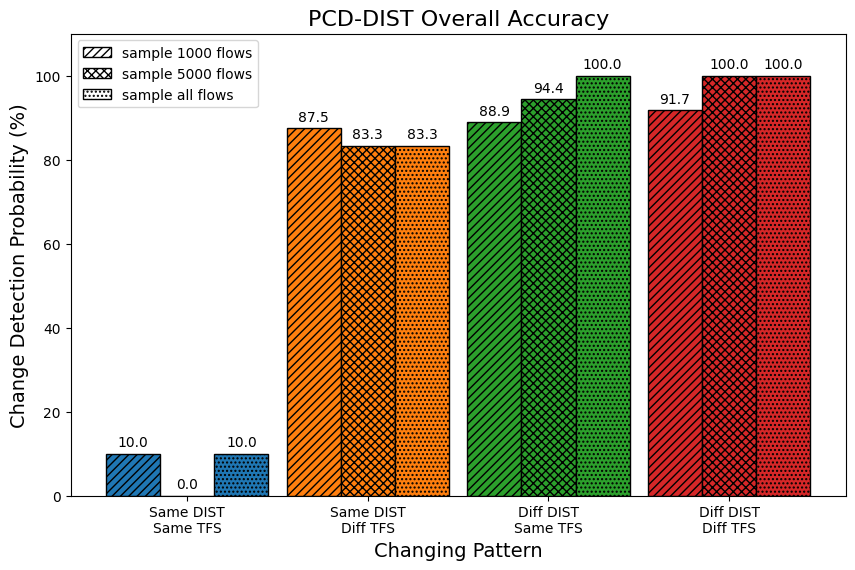

In [60]:
def plot_overall_acc(accuracies = [[0, 83.3, 94.4, 100]]):

    # Categories and their corresponding accuracies
    categories = ['Same DIST\nSame TFS', 'Same DIST\nDiff TFS', 'Diff DIST\nSame TFS', 'Diff DIST\nDiff TFS']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XXXX', '....']
    labels = [f'sample {k} flows' for k in [1000, 5000, 'all']]

    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(len(accuracies)):
        bars = ax.bar(np.arange(len(categories)) + (0.3*i), accuracies[i], color=colors, width=0.3, label=labels[i], hatch=hatches[i], edgecolor='black')
    
        # Adding the text on top of the bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x()+bar.get_width()/2, yval+1, f'{yval}', va='bottom', ha='center')  # va: vertical alignment
            
    # Adding labels and title
    ax.set_xlabel('Changing Pattern', fontsize=14)
    ax.set_ylabel('Change Detection Probability (%)', fontsize=14)
    ax.set_title('PCD-DIST Overall Accuracy', fontsize=16)
    ax.set_ylim(0, 110)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(np.arange(len(categories)) + 0.3)
    ax.set_xticklabels(categories)

    # Create custom legend handles with no fill color
    from matplotlib.patches import Patch
    legend_handles = [Patch(facecolor='none', edgecolor='black', hatch=hatches[i], label=labels[i]) for i in range(len(labels))]

    # Apply custom legend to the plot
    ax.legend(handles=legend_handles)

    # plt.legend()
    plt.show()
    
accuraices= [[10, 87.5, 88.9, 91.7],
             [0, 83.3, 94.4, 100],
             [10, 83.3, 100, 100]]
plot_overall_acc(accuracies=accuraices)

68 100
75 100
80 100
80 100


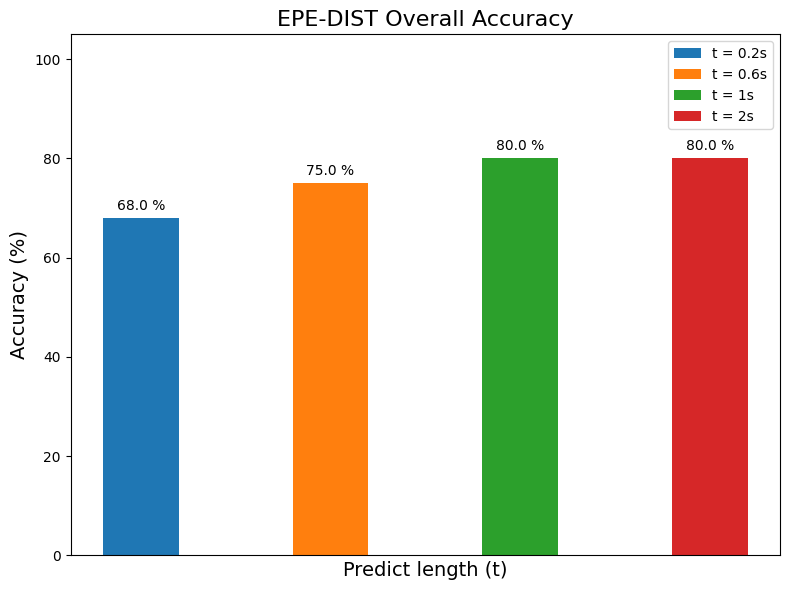

In [28]:
def plot_fsd_acc(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20, predict_times = [0.2, 0.6, 1, 2], k=5000):
    
    res = []
    for pt in predict_times:
        # top 10000
        res_fsd = {}
        
        label = []
        answer = []
        
        for d in datasets:
            for w in width:
                name = f'{d[:-5]}_{w}'
                
                # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
                fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size, k)
                # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

                label.append(name)
                answer.append(int(d.split('_')[1]))
                # answer.append(10)
                
                res_fsd[name] = fsd_total
                
        
        # find dist
        success = 0
        profiler_fsd = prepare_profiler_dirty_fsd_data(k=k)
        # prepare profiler avg dirty fsd
        profiler_avg_fsd = {}
        for name, fsd_list in profiler_fsd.items():
            profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
            
        for i in range(len(label)):
            pcap_file_name = label[i][:-5] + ".pcap"
            vote = {}
            all_mrds = []
            
            start = 0
            if label[i].split("_")[1] != "10":
                start = 30
                
            ### vote
            for j in range(min(int(pt * 1000 / window_size), len(res_fsd[label[i]])-start)):
                # print(start + j)
                dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, res_fsd[label[i]][start+j])
                all_mrds.append(mrds)
                
                if dist_name in vote:
                    vote[dist_name] += 1
                else:
                    vote[dist_name] = 1
            
            if start == 0 or start == 5:
                if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                        success += 1
            else:
                if pcap_file_name.split("-")[1].split("_")[-1] == max(vote, key=vote.get).split("-")[0]:
                        success += 1
            
        print(success, len(label))
        res.append(round(success*100/len(label), 1))
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plotting the first subplot
    bars = ax.bar(np.arange(len(predict_times)), res, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], width=0.4, label=[f't = {l}s'for l in predict_times])
    # Adding labels and title
    ax.set_xlabel('Predict length (t)', fontsize=14)
    ax.set_ylabel('Accuracy (%)', fontsize=14)
    ax.set_title('EPE-DIST Overall Accuracy', fontsize=16)
    ax.set_ylim(0, 105)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks([])
    ax.legend()

    # Adding the text on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, yval+1, f'{yval} %', va='bottom', ha='center')  # va: vertical alignment

    # Layout adjustment to prevent overlap
    # 87
    plt.tight_layout()
    plt.show()
    
plot_fsd_acc(datasets=pcap_file, predict_times = [0.2, 0.6, 1, 2])
    